### Temperature Download and QAQC

### Import

In [ ]:
import os
import arcpy
import csv
import requests
from collections import deque
import time
import pandas as pd
from datetime import timedelta

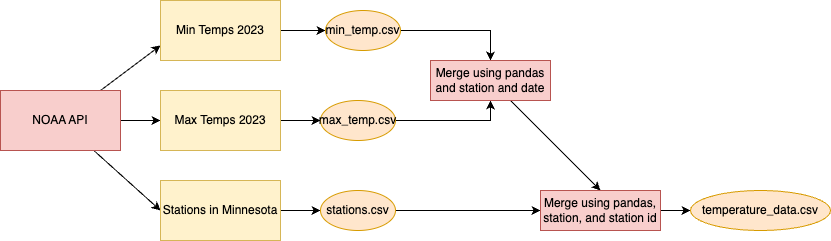

Credits: chat.openai.com

### Data Prep

In [77]:
#Get current directory
path = os.path.dirname(arcpy.mp.ArcGISProject('CURRENT').filePath)
os.chdir(path)
#Open text file and read key. 
with open('./Keys/NOAA.txt', 'r') as file:
    #Get rid of whitespace
    key = file.read().strip()
#URL for API
url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/'
#Get the key for the API
headers = {
    'token': key
}

#Function to request from API with parameters added to API URL
def call_api(url, endpoint, headers, params):
    url += endpoint
    response = requests.get(url, headers=headers, params=params)
    #Confirm request worked
    if response.status_code == 200:
        station_data = response.json()
        print("Call successful")
    else:
        print(response.status_code)
        station_data = response.status_code
    return station_data

#Saves dictionaries to CSV file. 
def save_csv(data, name):
    with open(name, mode='w', newline='') as file:
        #Create CSV for returned data
        dictwriter = csv.DictWriter(file, fieldnames=data[0].keys())
        #Write headers and rows
        dictwriter.writeheader()
        for row in data:
            dictwriter.writerow(row)
    print(f'Data written to {name}')

### Download and Save Station Information

In [81]:
#Establish endpoint
endpoint = "/stations/"
parameters = {
    "locationid": "FIPS:27",
    "limit": 1000,
    "offset": 1
}

#List for results
results = []

#Download data in a loop. Keep downloding the data until we get it all.
while True:
    #Make API call
    station_data = call_api(url, endpoint, headers, parameters)
    #Confirm the API returned data and add to data list.
    #Each dictionary is a station.
    if station_data is not None and 'results' in station_data:
        results.extend(station_data['results'])
        if parameters['offset'] + parameters['limit'] - 1 < station_data['metadata']['resultset']['count']:
            parameters['offset'] += parameters['limit']
        else:
        #Break when there is no more data
            break
    else:
        #Warn if there is an error
        print("No data returned or an error occurred")
        break
        
#Save the data to a CSV
save_csv(results, 'stations.csv')

Call successful
Call successful
Call successful
Data written to stations.csv


### Download Max Temperature Data

In [83]:
#Establish endpoint
endpoint = '/data/'
parameters = {
    'datasetid': 'GHCND', #Climate data
    'locationid': 'FIPS:27', #Minnesota
    'datatypeid': 'TMAX', #Max temp
    'limit': 1000,
    'offset': 1,
    'units': 'metric', #Celsius
    'startdate': '2023-01-01',
    'enddate': '2023-12-31'
}

#Empty list for temperature results
results = []
max_try = 30  #Maximum number of tries
delay = 5  #Delay between tries

#Loop to call API. Has error detection to prevent breaking.
while True:
    try:
        #Makes call with parameters from above
        temp_data = call_api(url, endpoint, headers, parameters)
        #Confirm data was returned
        if temp_data is not None and 'results' in temp_data:
            #Append temp data to list
            results.extend(temp_data['results'])
            #Check if there is more results that can be downloaded
            if parameters['offset'] + parameters['limit'] - 1 < temp_data['metadata']['resultset']['count']:
                parameters['offset'] += parameters['limit']
            else:
                #Break when no more results
                break 
        else:
            print("No results found.")
            break

    #If call or data fails, print an error
    except Exception as e:
        print(f"An error occurred: {e}")
        max_try -= 1 
        if max_try <= 0:
            print("Maximum tries reached.")
            break
        else:
            print("Retrying...")
            #Delay before retrying
            time.sleep(delay)  

#Save results to CSV
save_csv(results, 'max_temp.csv')

Call successful
Call successful
Call successful
Call successful
Call successful
503
An error occurred: argument of type 'int' is not iterable
Retrying...
Call successful
Call successful
Call successful
503
An error occurred: argument of type 'int' is not iterable
Retrying...
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call

### Download Min Temperature Data

In [84]:
#Establish endpoint
endpoint = '/data/'
parameters = {
    'datasetid': 'GHCND', #Climate data
    'locationid': 'FIPS:27', #Minnesota
    'datatypeid': 'TMIN', #Min temp
    'limit': 1000,
    'offset': 1,
    'units': 'metric', #Celsius
    'startdate': '2023-01-01',
    'enddate': '2023-12-31'
}

#Empty list for temperature results
results = []
max_try = 30  #Maximum number of tries
delay = 5  #Delay between tries

#Loop to call API. Has error detection to prevent breaking.
while True:
    try:
        #Makes call with parameters from above
        temp_data = call_api(url, endpoint, headers, parameters)
        #Confirm data was returned
        if temp_data is not None and 'results' in temp_data:
            #Append temp data to list
            results.extend(temp_data['results'])
            #Check if there is more results that can be downloaded
            if parameters['offset'] + parameters['limit'] - 1 < temp_data['metadata']['resultset']['count']:
                parameters['offset'] += parameters['limit']
            else:
                #Break when no more results
                break 
        else:
            print("No results found.")
            break

    #If call or data fails, print an error.
    except Exception as e:
        print(f"An error occurred: {e}")
        max_try -= 1 
        if max_try <= 0:
            print("Maximum tries reached.")
            break
        else:
            print("Retrying...")
            #Delay before retrying
            time.sleep(delay)  

#Save results to CSV
save_csv(results, 'min_temp.csv')

Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
503
An error occurred: argument of type 'int' is not iterable
Retrying...
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successful
Call successfu

### Clean up data

In [86]:
#Put csvs into dataframes
max_df = pd.read_csv('max_temp.csv')
min_df = pd.read_csv('min_temp.csv')

#Combine max and min using date and station
combined_df = pd.merge(max_df[['date', 'station', 'value']], min_df[['date', 'station', 'value']], on=['date', 'station'], suffixes=('_max', '_min'))

#Need to append location data to the combined temperature data
station_df = pd.read_csv('stations.csv')

#Use station and station ID to merge data frames
combined_location_df = pd.merge(combined_df, station_df, left_on='station', right_on='id', how='left')

#Only have useful numbers
cleaned_location_df = combined_location_df[['date', 'station', 'value_max', 'value_min', 'latitude', 'longitude']]

#Put into new CSV
cleaned_location_df.to_csv('temperature_data.csv')

### QAQC

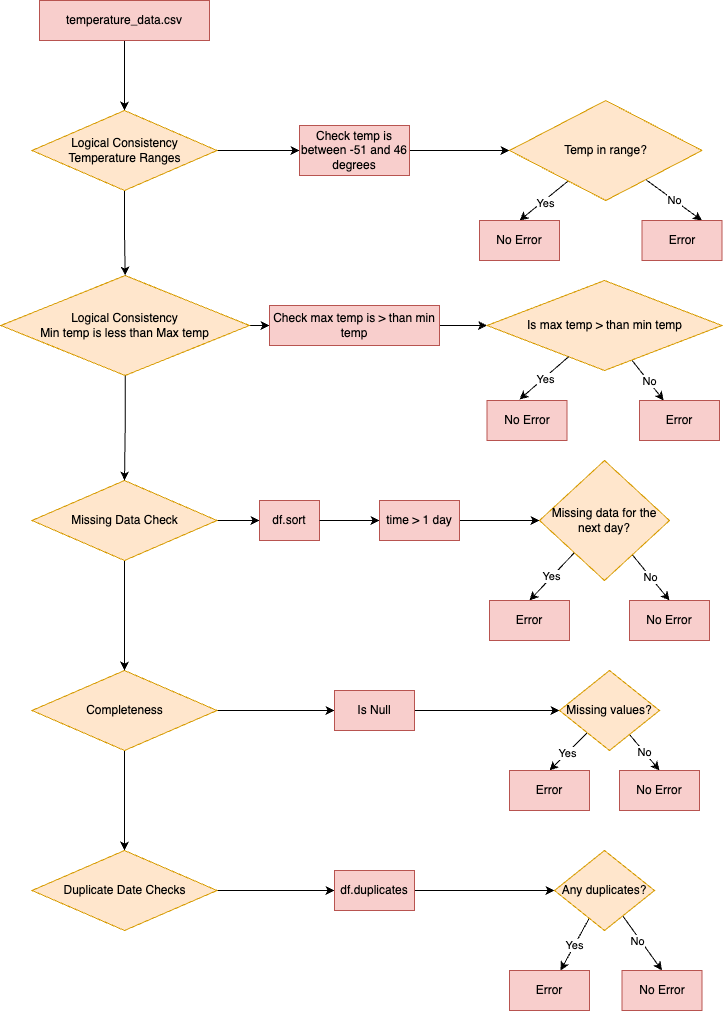

In [100]:
#Load data in dataframe
df = pd.read_csv('temperature_data.csv')

#Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

#Logical Consistency
# Max temp should not be less than the min temp
logical = df[df['value_min'] > df['value_max']].shape[0]
if logical > 0:
    print('Logical Consistency: Bad data: Rows where max temp is less than min temp.')   
else:
    print('Logical Consistency: Good data. Max temp is greater than min temp.') 
    
#Range Check
temperature = {
    'max_below': df[df['value_max'] < -51].shape[0], #Check max isnt below typical min
    'max_above': df[df['value_max'] > 46].shape[0], #Check max isnt above typical max
    'min_below': df[df['value_min'] < -51].shape[0], #Check min isnt below typical min
    'min_above': df[df['value_min'] > 46].shape[0] #Check min isnt above typical max
}
#Count outliers
outliers = sum(temperature.values())
if outliers > 0:
    print(f'Logical Consistency: Bad data: {outliers} temperature outliers detected.')
else:
    print(f'Logical Consistency: Good data: {outliers} outliers detected.')
    
# Check for missing values
missing = df[['value_max', 'value_min']].isnull().sum()
if missing['value_max'] > 0:
    print('Missing Values: Bad data: Missing max temp data.')
elif missing['value_min'] > 0:
    print(f'Missing Values: Bad data: Missing min temp data.')
else:
    print(f'Missing Values: Good data: No missing temp values.')

#Gaps in data
sort_df = df.sort_values(by=['station', 'date'])
sort_df['next_date'] = sort_df.groupby('station')['date'].shift(-1)
sort_df['date_diff'] = sort_df['next_date'] - sort_df['date']
gaps = sort_df[sort_df['date_diff'] > timedelta(days=1)].shape[0]

if gaps > 1000:
    print(f'Potential Gaps: Bad data: {gaps} gaps.')  
else:
    print(f'Potential Gaps: Good data: {gaps} gaps.')

#Check for Duplicate Dates 
duplicates = df.duplicated(subset=['station', 'date']).sum()

if duplicates > 0:
    print(f'Duplicate Date Check: Bad data: There are {dupliates} duplicate dates in the dataset.')
else:
    print(f'Duplicate Date Check: Good data: {duplicates} duplicate dates in dataset.')  # If no duplicate dates found, print data is good

Logical Consistency: Good data. Max temp is greater than min temp.
Logical Consistency: Good data: 0 outliers detected.
Missing Values: Good data: No missing temp values.
Potential Gaps: Good data: 751 gaps.
Duplicate Date Check: Good data: 0 duplicate dates in dataset.
